### 1. Load/create dataset

In [ ]:
from datasets import load_dataset

# Load the custom dataset (or it if it does not exist)
# Param 1: location of the dataset loader script
# Param 2: location of cache folder, where the dataset will be saved
dataset = load_dataset(r'C:\Users\Habram\Documents\thesis-masters\invoice_generation\istvoices_dataset.py', 
                       cache_dir=r'C:\Users\Habram\.cache')

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image'],
        num_rows: 150
    })
    test: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image'],
        num_rows: 50
    })
})

In [3]:
dataset["train"].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['B-R_NAME', 'B-R_STREET', 'B-R_HOUSENUMBER', 'B-R_ZIP', 'B-R_CITY', 'B-R_COUNTRY', 'B-R_VAT', 'I-R_NAME', 'I-R_STREET', 'I-R_HOUSENUMBER', 'I-R_ZIP', 'I-R_CITY', 'I-R_COUNTRY', 'I-R_VAT', 'B-S_NAME', 'B-S_STREET', 'B-S_HOUSENUMBER', 'B-S_ZIP', 'B-S_CITY', 'B-S_COUNTRY', 'B-S_VAT', 'I-S_NAME', 'I-S_STREET', 'I-S_HOUSENUMBER', 'I-S_ZIP', 'I-S_CITY', 'I-S_COUNTRY', 'I-S_VAT', 'B-S_BANK', 'B-S_BIC', 'B-S_IBAN', 'B-S_TEL', 'B-S_EMAIL', 'I-S_BANK', 'I-S_BIC', 'I-S_IBAN', 'I-S_TEL', 'I-S_EMAIL', 'B-I_NUMBER', 'B-I_DATE', 'B-I_DUEDATE', 'B-I_AMOUNT', 'B-I_CURRENCY', 'I-I_NUMBER', 'I-I_DATE', 'I-I_DUEDATE', 'I-I_AMOUNT', 'I-I_CURRENCY', 'OTHER'], id=None), length=-1, id=None),
 'image': Image(decode=True, id=None)

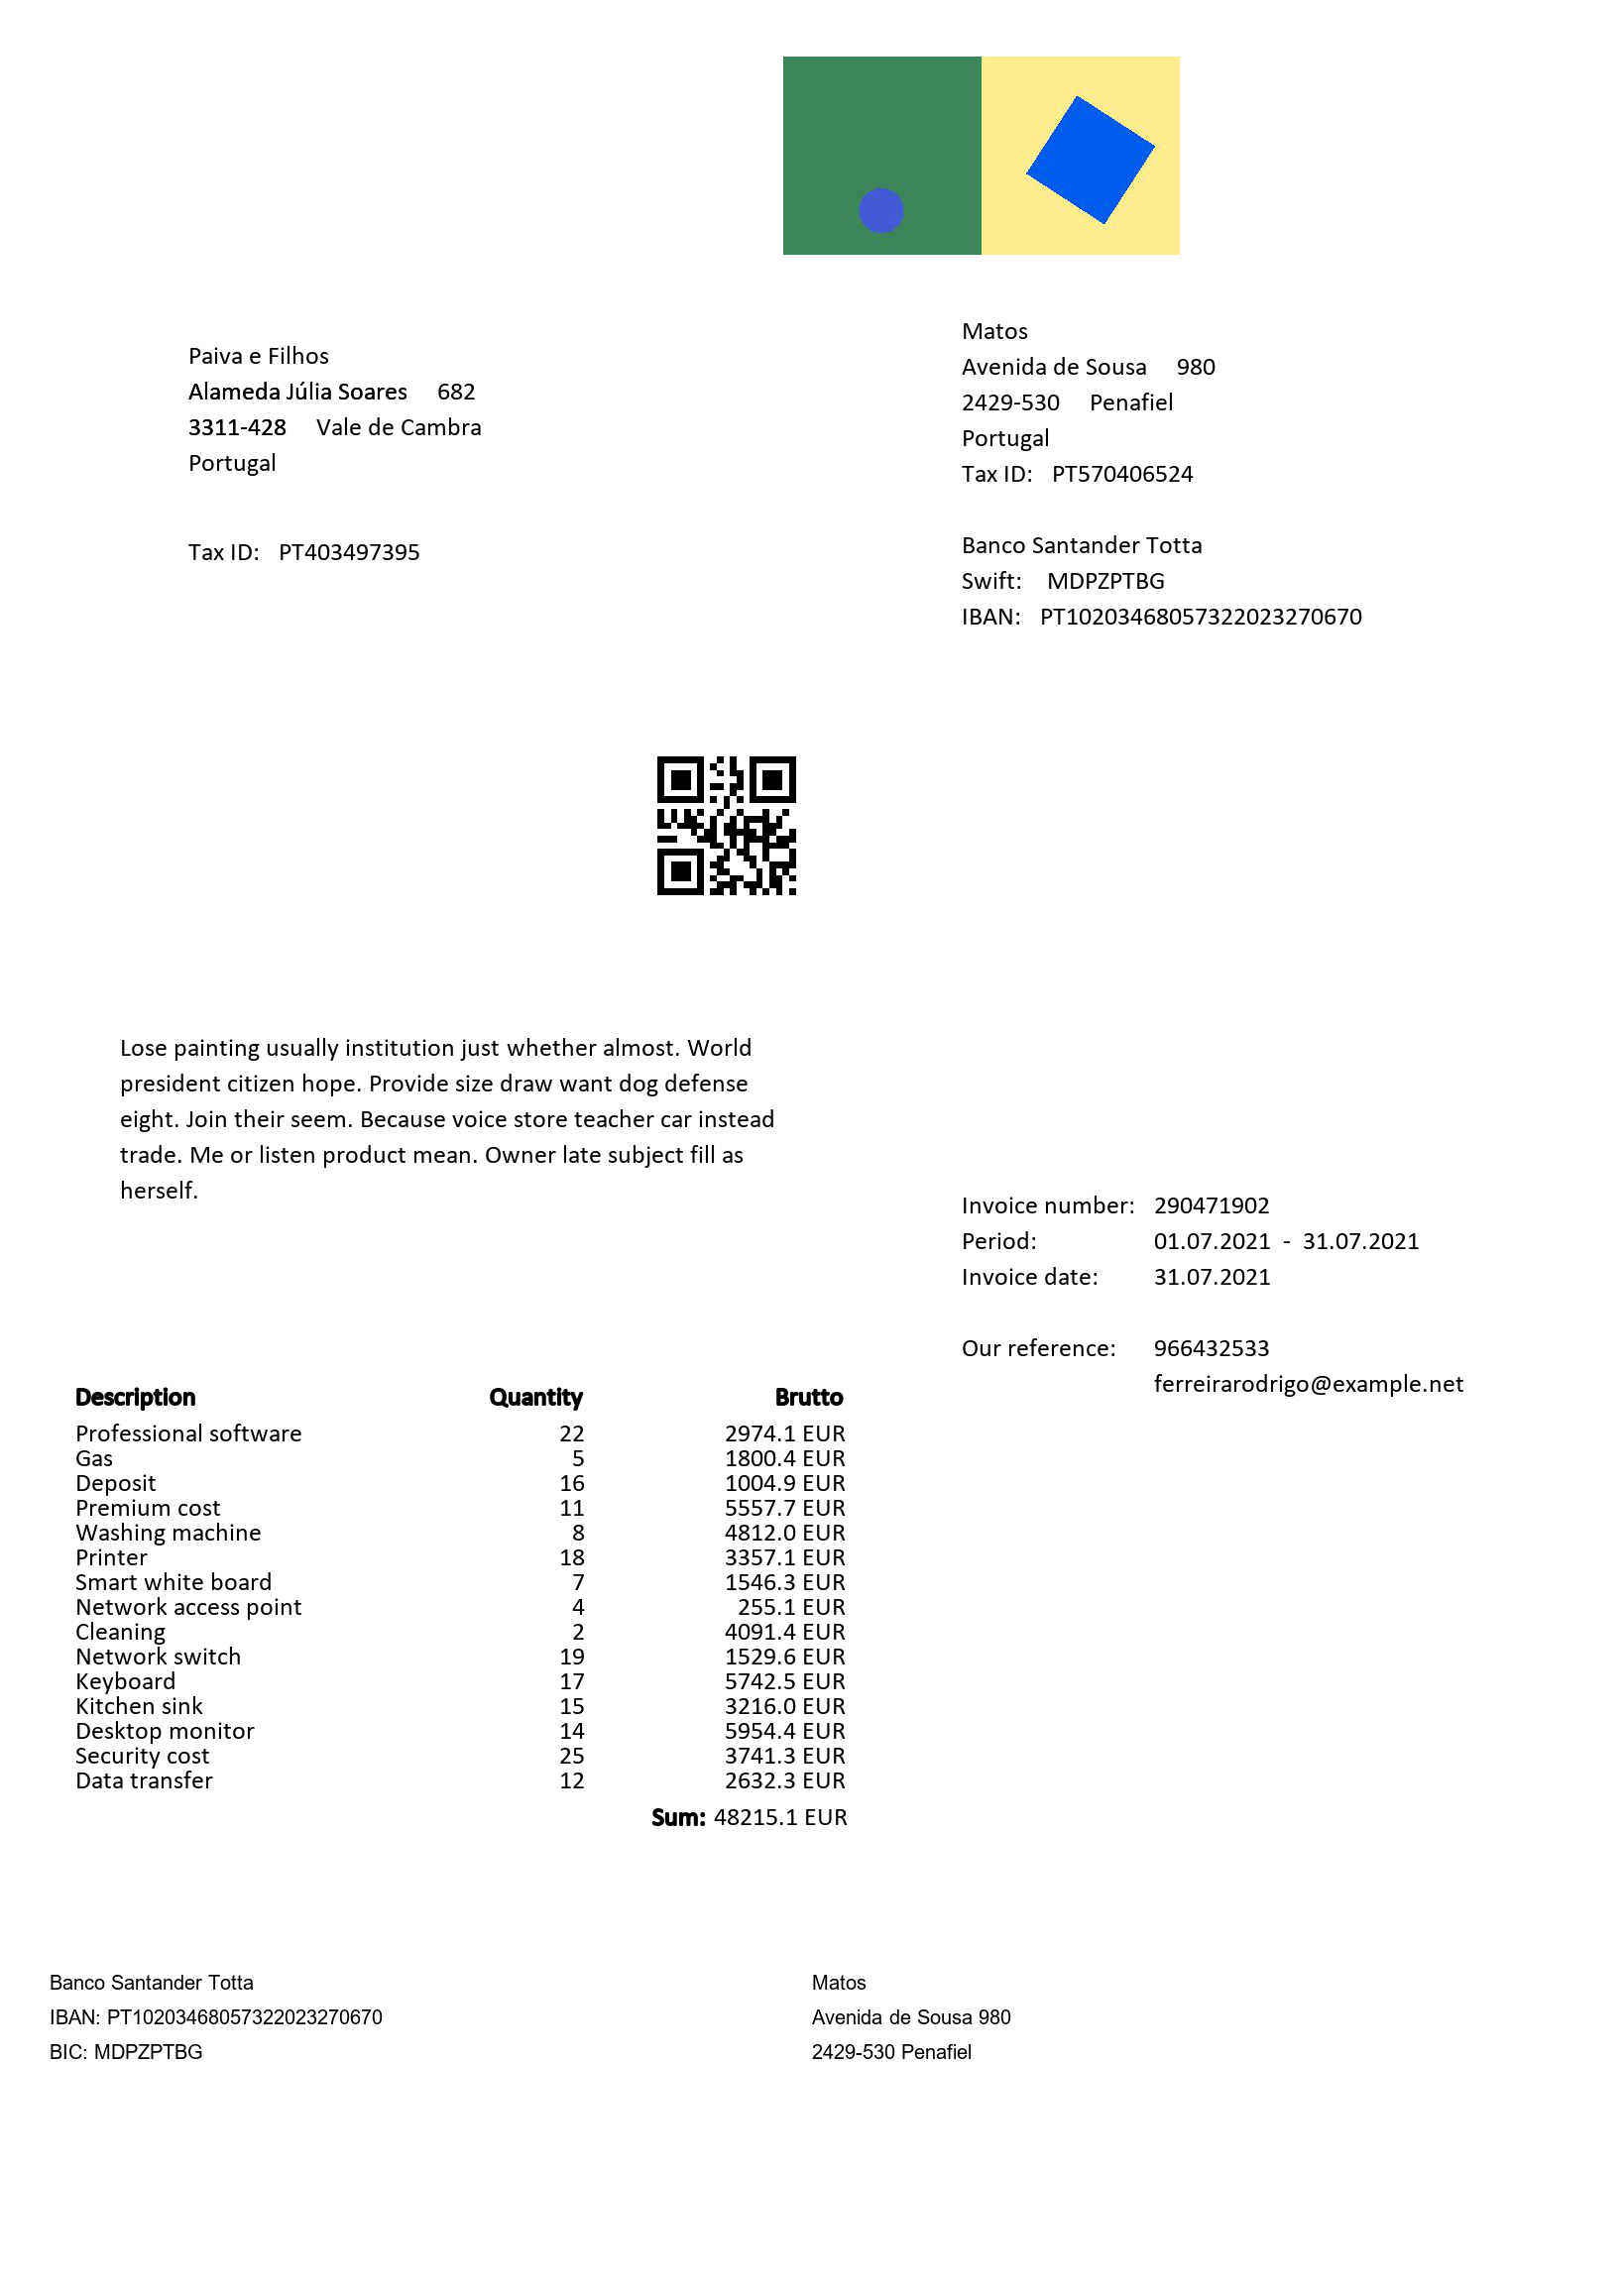

In [4]:
example = dataset["train"][0]
example["image"]

In [5]:
words, boxes, ner_tags = example["tokens"], example["bboxes"], example["ner_tags"]
print(words)
print(boxes)
print(ner_tags)

['Paiva', 'e', 'Filhos', 'Alameda', 'Júlia', 'Soares', '682', 'Alameda', 'Júlia', 'Soares', '3311-428', 'Vale', 'de', 'Cambra', '3311-428', 'Portugal', 'Tax', 'ID:', 'PT403497395', 'Matos', 'Avenida', 'de', 'Sousa', '980', '2429-530', 'Penafiel', 'Portugal', 'Tax', 'ID:', 'PT570406524', 'Banco', 'Santander', 'Totta', 'Swift:', 'MDPZPTBG', 'IBAN:', 'PT10203468057322023270670', 'Invoice', 'number:', '290471902', 'Period:', '01.07.2021', '-', '31.07.2021', 'Invoice', 'date:', '31.07.2021', 'Our', 'reference:', '966432533', 'ferreirarodrigo@example.net', 'Description', 'Quantity', 'Brutto', 'Professional', 'software', '22', 'EUR', '2974.1', 'Gas', '5', 'EUR', '1800.4', 'Deposit', '16', 'EUR', '1004.9', 'Premium', 'cost', '11', 'EUR', '5557.7', 'Washing', 'machine', '8', 'EUR', '4812.0', 'Printer', '18', 'EUR', '3357.1', 'Smart', 'white', 'board', '7', 'EUR', '1546.3', 'Network', 'access', 'point', '4', 'EUR', '255.1', 'Cleaning', '2', 'EUR', '4091.4', 'Network', 'switch', '19', 'EUR', '152

### 2. Prepare dataset

In [6]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

In [8]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image"
text_column_name = "tokens"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

label_list = features[label_column_name].feature.names
id2label = {k: v for k,v in enumerate(label_list)}
label2id = {v: k for k,v in enumerate(label_list)}

In [9]:
print(label_list)
print(id2label)

['B-R_NAME', 'B-R_STREET', 'B-R_HOUSENUMBER', 'B-R_ZIP', 'B-R_CITY', 'B-R_COUNTRY', 'B-R_VAT', 'I-R_NAME', 'I-R_STREET', 'I-R_HOUSENUMBER', 'I-R_ZIP', 'I-R_CITY', 'I-R_COUNTRY', 'I-R_VAT', 'B-S_NAME', 'B-S_STREET', 'B-S_HOUSENUMBER', 'B-S_ZIP', 'B-S_CITY', 'B-S_COUNTRY', 'B-S_VAT', 'I-S_NAME', 'I-S_STREET', 'I-S_HOUSENUMBER', 'I-S_ZIP', 'I-S_CITY', 'I-S_COUNTRY', 'I-S_VAT', 'B-S_BANK', 'B-S_BIC', 'B-S_IBAN', 'B-S_TEL', 'B-S_EMAIL', 'I-S_BANK', 'I-S_BIC', 'I-S_IBAN', 'I-S_TEL', 'I-S_EMAIL', 'B-I_NUMBER', 'B-I_DATE', 'B-I_DUEDATE', 'B-I_AMOUNT', 'B-I_CURRENCY', 'I-I_NUMBER', 'I-I_DATE', 'I-I_DUEDATE', 'I-I_AMOUNT', 'I-I_CURRENCY', 'OTHER']
{0: 'B-R_NAME', 1: 'B-R_STREET', 2: 'B-R_HOUSENUMBER', 3: 'B-R_ZIP', 4: 'B-R_CITY', 5: 'B-R_COUNTRY', 6: 'B-R_VAT', 7: 'I-R_NAME', 8: 'I-R_STREET', 9: 'I-R_HOUSENUMBER', 10: 'I-R_ZIP', 11: 'I-R_CITY', 12: 'I-R_COUNTRY', 13: 'I-R_VAT', 14: 'B-S_NAME', 15: 'B-S_STREET', 16: 'B-S_HOUSENUMBER', 17: 'B-S_ZIP', 18: 'B-S_CITY', 19: 'B-S_COUNTRY', 20: 'B-S_VAT

In [52]:
# https://github.com/huggingface/transformers/blob/v4.30.0/src/transformers/models/layoutlmv3/processing_layoutlmv3.py

def prepare_examples(examples):
  images = examples[image_column_name]
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [54]:
from datasets import Features, Sequence, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(feature=Value(dtype='int64')),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
test_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

Loading cached processed dataset at C:\Users\Habram\.cache\istvoices_dataset\default\0.0.0\5c1a7a911a69aec807ce5c80d6b322c66d9fc07f3fb1f6a29984d94d24f94b97\cache-a7681689b61199e3.arrow
Loading cached processed dataset at C:\Users\Habram\.cache\istvoices_dataset\default\0.0.0\5c1a7a911a69aec807ce5c80d6b322c66d9fc07f3fb1f6a29984d94d24f94b97\cache-c4547ca9c15711e8.arrow


In [55]:
train_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 150
})

In [56]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> Paiva e Filhos Alameda Júlia Soares 682 Alameda Júlia Soares 3311-428 Vale de Cambra 3311-428 Portugal Tax ID: PT403497395 Matos Avenida de Sousa 980 2429-530 Penafiel Portugal Tax ID: PT570406524 Banco Santander Totta Swift: MDPZPTBG IBAN: PT10203468057322023270670 Invoice number: 290471902 Period: 01.07.2021 - 31.07.2021 Invoice date: 31.07.2021 Our reference: 966432533 ferreirarodrigo@example.net Description Quantity Brutto Professional software 22 EUR 2974.1 Gas 5 EUR 1800.4 Deposit 16 EUR 1004.9 Premium cost 11 EUR 5557.7 Washing machine 8 EUR 4812.0 Printer 18 EUR 3357.1 Smart white board 7 EUR 1546.3 Network access point 4 EUR 255.1 Cleaning 2 EUR 4091.4 Network switch 19 EUR 1529.6 Keyboard 17 EUR 5742.5 Kitchen sink 15 EUR 3216.0 Desktop monitor 14 EUR 5954.4 Security cost 25 EUR 3741.3 Data transfer 12 EUR 2632.3 EUR 48215.1 Sum: Banco Santander Totta IBAN: PT10203468057322023270670 BIC: MDPZPTBG Matos Avenida de Sousa 980 2429-530 Penafiel Lose painting usually institut

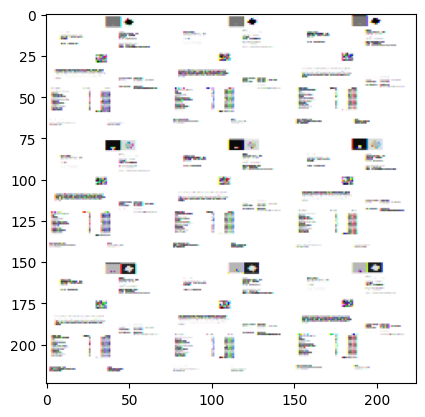

In [57]:
from matplotlib import pyplot as plt
import numpy as np

im = np.array(example['pixel_values'])
im = im.reshape(224,224,3)

plt.imshow((im * 255).astype(np.uint8))
plt.savefig(r'C:\Users\Habram\Pictures\a.png')
plt.show()

In [58]:
train_dataset.set_format("torch")

In [59]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [60]:
test_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 50
})

In [61]:
processor.tokenizer.decode(test_dataset[0]["input_ids"])

'<s> Holzapfel e.V. Michel-Martin-Straße 9 Michel-Martin-Straße 54650 Mellrichstadt 54650 Germany Tax ID: DE988346896 Hein Krebs GmbH & Co. KG Marie-Nette-Gasse 369 61606 Wolfratshausen Germany Tax ID: DE748626690 Commerzbank Swift: ZHXVDEQ8 IBAN: DE34930453621873413099 Invoice number: 365934136 Period: 01.04.2019 - 30.04.2019 Invoice date: 30.04.2019 Our reference: +49(0) 101401481 charlotte21@example.com Description Quantity Tax % Brutto Professional beamer 8 15 EUR 2842.8 Premium cost 1 5 EUR 1868.0 Furniture 14 10 EUR 1898.6 Isolation 3 7 EUR 1780.5 Garbage can 7 16 EUR 2605.4 Party organization 5 9 EUR 2382.7 EUR 13378.0 Sum: Commerzbank IBAN: DE34930453621873413099 BIC: ZHXVDEQ8 Hein Krebs GmbH & Co. KG Marie-Nette-Gasse 369 61606 Wolfratshausen Contact: Kati Börner Tax ID: DE748626690 Red sometimes manager soon. Appear house not. Increase make hundred. Cause six know peace. Beyond ability shake. Threat writer trade accept tell sort talk. Phone knowledge wife Republican writer su

In [62]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 Pa 0
iva -100
 e 7
 Fil 7
h -100
os -100
 Al 1
ameda -100
 J 8
ú -100
lia -100
 So 8
ares -100
 6 2
82 -100
 Al 1
ameda -100
 J 8
ú -100
lia -100
 So 8
ares -100
 33 3
11 -100
- -100
428 -100
 Vale 4
 de 11
 Camb 11
ra -100
 33 3
11 -100
- -100
428 -100
 Portugal 5
 Tax 48
 ID 48
: -100
 PT 6
40 -100
34 -100
97 -100
395 -100
 Mat 14
os -100
 Aven 15
ida -100
 de 22
 S 22
ous -100
a -100
 980 16
 24 17
29 -100
- -100
530 -100
 Pen 18
af -100
iel -100
 Portugal 19
 Tax 48
 ID 48
: -100
 PT 20
570 -100
40 -100
65 -100
24 -100
 Ban 28
co -100
 Sant 33
ander -100
 T 33
otta -100
 Swift 48
: -100
 M 29
DP -100
Z -100
PT -100
BG -100
 IB 48
AN -100
: -100
 PT 30
10 -100
20 -100
346 -100
80 -100
57 -100
32 -100
20 -100
23 -100
27 -100
06 -100
70 -100
 Inv 48
oice -100
 number 48
: -100
 290 38
47 -100
19 -100
02 -100
 Period 48
: -100
 01 48
. -100
07 -100
. -100
20 -100
21 -100
 - 48
 31 48
. -100
07 -100
. -100
20 -100
21 -100
 Inv 48
oice -100
 date 48
: -100
 31 39
. -100
07 -100

### 3. Define metrics

In [19]:
from datasets import load_metric

metric = load_metric("seqeval")

C:\Users\Habram\AppData\Local\Temp\ipykernel_8640\3097260500.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [20]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

### 4. Define the model

In [21]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test",
                                  max_steps=1000,
                                  per_device_train_batch_size=2,
                                  per_device_eval_batch_size=2,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1")

In [23]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

In [24]:
trainer.train()

c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\transformers\modeling_utils.py:873: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/24 [00:00<?, ?it/s]

c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: OTHER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.8340321183204651, 'eval_precision': 0.5181347150259067, 'eval_recall': 0.39447731755424065, 'eval_f1': 0.44792833146696526, 'eval_accuracy': 0.8085835895010641, 'eval_runtime': 109.3641, 'eval_samples_per_second': 0.43, 'eval_steps_per_second': 0.219, 'epoch': 1.41}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_loss': 0.4053690433502197, 'eval_precision': 0.7899628252788105, 'eval_recall': 0.8382642998027613, 'eval_f1': 0.8133971291866029, 'eval_accuracy': 0.9514069519981083, 'eval_runtime': 123.2896, 'eval_samples_per_second': 0.381, 'eval_steps_per_second': 0.195, 'epoch': 2.82}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_loss': 0.1865558624267578, 'eval_precision': 0.8459105286940805, 'eval_recall': 0.9230769230769231, 'eval_f1': 0.8828106578637114, 'eval_accuracy': 0.9776542917947505, 'eval_runtime': 119.039, 'eval_samples_per_second': 0.395, 'eval_steps_per_second': 0.202, 'epoch': 4.23}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_loss': 0.10280420631170273, 'eval_precision': 0.9296912114014252, 'eval_recall': 0.9649901380670611, 'eval_f1': 0.9470118557948222, 'eval_accuracy': 0.9908961929534169, 'eval_runtime': 109.7389, 'eval_samples_per_second': 0.428, 'eval_steps_per_second': 0.219, 'epoch': 5.63}
{'loss': 0.578, 'learning_rate': 5e-06, 'epoch': 7.04}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_loss': 0.06718233227729797, 'eval_precision': 0.95, 'eval_recall': 0.9743589743589743, 'eval_f1': 0.9620253164556962, 'eval_accuracy': 0.9938519744620478, 'eval_runtime': 112.6741, 'eval_samples_per_second': 0.417, 'eval_steps_per_second': 0.213, 'epoch': 7.04}


c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\transformers\modeling_utils.py:873: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/24 [00:00<?, ?it/s]

c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: OTHER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


{'eval_loss': 0.04949404299259186, 'eval_precision': 0.9556412729026037, 'eval_recall': 0.9773175542406312, 'eval_f1': 0.9663578742077036, 'eval_accuracy': 0.9945613620241192, 'eval_runtime': 111.2835, 'eval_samples_per_second': 0.422, 'eval_steps_per_second': 0.216, 'epoch': 8.45}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_loss': 0.04038771986961365, 'eval_precision': 0.9679767103347889, 'eval_recall': 0.9837278106508875, 'eval_f1': 0.9757887013939839, 'eval_accuracy': 0.9960983684086072, 'eval_runtime': 112.6236, 'eval_samples_per_second': 0.417, 'eval_steps_per_second': 0.213, 'epoch': 9.86}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_loss': 0.03495073691010475, 'eval_precision': 0.9901864573110893, 'eval_recall': 0.995069033530572, 'eval_f1': 0.9926217412690604, 'eval_accuracy': 0.9988176873965476, 'eval_runtime': 113.4837, 'eval_samples_per_second': 0.414, 'eval_steps_per_second': 0.211, 'epoch': 11.27}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_loss': 0.03217892348766327, 'eval_precision': 0.9911634756995582, 'eval_recall': 0.9955621301775148, 'eval_f1': 0.9933579335793358, 'eval_accuracy': 0.9989359186568929, 'eval_runtime': 113.0511, 'eval_samples_per_second': 0.416, 'eval_steps_per_second': 0.212, 'epoch': 12.68}
{'loss': 0.0649, 'learning_rate': 0.0, 'epoch': 14.08}


  0%|          | 0/24 [00:00<?, ?it/s]

{'eval_loss': 0.03124401904642582, 'eval_precision': 0.9950811608460404, 'eval_recall': 0.997534516765286, 'eval_f1': 0.9963063284905196, 'eval_accuracy': 0.9994088436982739, 'eval_runtime': 114.0878, 'eval_samples_per_second': 0.412, 'eval_steps_per_second': 0.21, 'epoch': 14.08}
{'train_runtime': 13733.5744, 'train_samples_per_second': 0.146, 'train_steps_per_second': 0.073, 'train_loss': 0.3214377555847168, 'epoch': 14.08}


TrainOutput(global_step=1000, training_loss=0.3214377555847168, metrics={'train_runtime': 13733.5744, 'train_samples_per_second': 0.146, 'train_steps_per_second': 0.073, 'train_loss': 0.3214377555847168, 'epoch': 14.08})

### 5. Evaluate the model

In [25]:
trainer.evaluate()

c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\transformers\modeling_utils.py:873: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


  0%|          | 0/24 [00:00<?, ?it/s]

c:\Users\Habram\Anaconda3\envs\LayoutLMv3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: OTHER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


{'eval_loss': 0.03124401904642582,
 'eval_precision': 0.9950811608460404,
 'eval_recall': 0.997534516765286,
 'eval_f1': 0.9963063284905196,
 'eval_accuracy': 0.9994088436982739,
 'eval_runtime': 121.6904,
 'eval_samples_per_second': 0.386,
 'eval_steps_per_second': 0.197,
 'epoch': 14.08}

In [26]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("test/checkpoint-1000")

In [27]:
example = dataset["test"][0]
print(example.keys())

dict_keys(['id', 'tokens', 'bboxes', 'ner_tags', 'image'])


In [28]:
image = example["image"]
words = example["tokens"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

input_ids torch.Size([1, 346])
attention_mask torch.Size([1, 346])
bbox torch.Size([1, 346, 4])
labels torch.Size([1, 346])
pixel_values torch.Size([1, 3, 224, 224])


In [29]:
with torch.no_grad():
  outputs = model(**encoding)

In [30]:
logits = outputs.logits
logits.shape

torch.Size([1, 346, 49])

In [31]:
predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

[48, 0, 7, 7, 7, 7, 7, 7, 7, 7, 1, 8, 8, 8, 8, 8, 8, 2, 1, 8, 8, 8, 8, 8, 8, 3, 3, 3, 4, 4, 11, 3, 3, 3, 5, 48, 48, 6, 6, 6, 6, 6, 6, 6, 14, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 15, 22, 22, 22, 22, 22, 22, 16, 17, 17, 17, 18, 25, 25, 25, 19, 48, 48, 48, 20, 20, 36, 36, 36, 28, 33, 33, 33, 48, 48, 29, 29, 29, 29, 29, 29, 29, 48, 48, 48, 30, 30, 30, 30, 30, 30, 30, 36, 36, 48, 48, 48, 48, 38, 38, 38, 36, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 39, 39, 39, 39, 39, 48, 48, 48, 31, 31, 36, 36, 36, 36, 36, 36, 32, 32, 32, 32, 32, 32, 32, 32, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 42, 48, 48, 48, 48, 48, 48, 48, 48, 42, 48, 48, 48, 48, 48, 48, 48, 48, 42, 48, 48, 48, 48, 48, 48, 48, 42, 48, 48, 48, 48, 48, 48, 48, 48, 48, 42, 48, 48, 48, 48, 48, 48, 48, 48, 42, 48, 48, 48, 48, 42, 41, 41, 48, 48, 48, 48, 28, 33, 33, 33, 48, 48, 48, 30, 30, 30, 30, 30, 30, 36, 36, 36, 48, 48, 48, 29, 29, 29, 29, 29, 29, 29, 14, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 15, 22,

In [32]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 0, -100, -100, -100, -100, 7, -100, -100, -100, 1, -100, -100, -100, -100, -100, -100, 2, 1, -100, -100, -100, -100, -100, -100, 3, -100, -100, 4, -100, -100, 3, -100, -100, 5, 48, 48, -100, 6, -100, -100, -100, -100, -100, 14, 21, -100, 21, -100, -100, 21, 21, -100, 21, -100, 15, -100, -100, -100, -100, -100, -100, 16, 17, -100, -100, 18, -100, -100, -100, 19, 48, 48, -100, 20, -100, -100, -100, -100, 28, -100, -100, -100, 48, -100, 29, -100, -100, -100, -100, -100, -100, 48, -100, -100, 30, -100, -100, -100, -100, -100, -100, -100, -100, 48, -100, 48, -100, 38, -100, -100, -100, 48, -100, 48, -100, -100, -100, -100, 48, 48, -100, -100, -100, -100, 48, -100, 48, -100, 39, -100, -100, -100, -100, 48, 48, -100, 31, -100, -100, -100, -100, 36, -100, -100, 32, -100, -100, -100, -100, -100, -100, -100, 48, 48, 48, 48, 48, -100, 48, 48, -100, 48, 48, 42, 48, -100, -100, -100, 48, 48, 48, 48, 42, 48, -100, -100, -100, 48, -100, 48, 48, 42, 48, -100, -100, 48, -100, 48, 48, 42, 48, -10

In [33]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

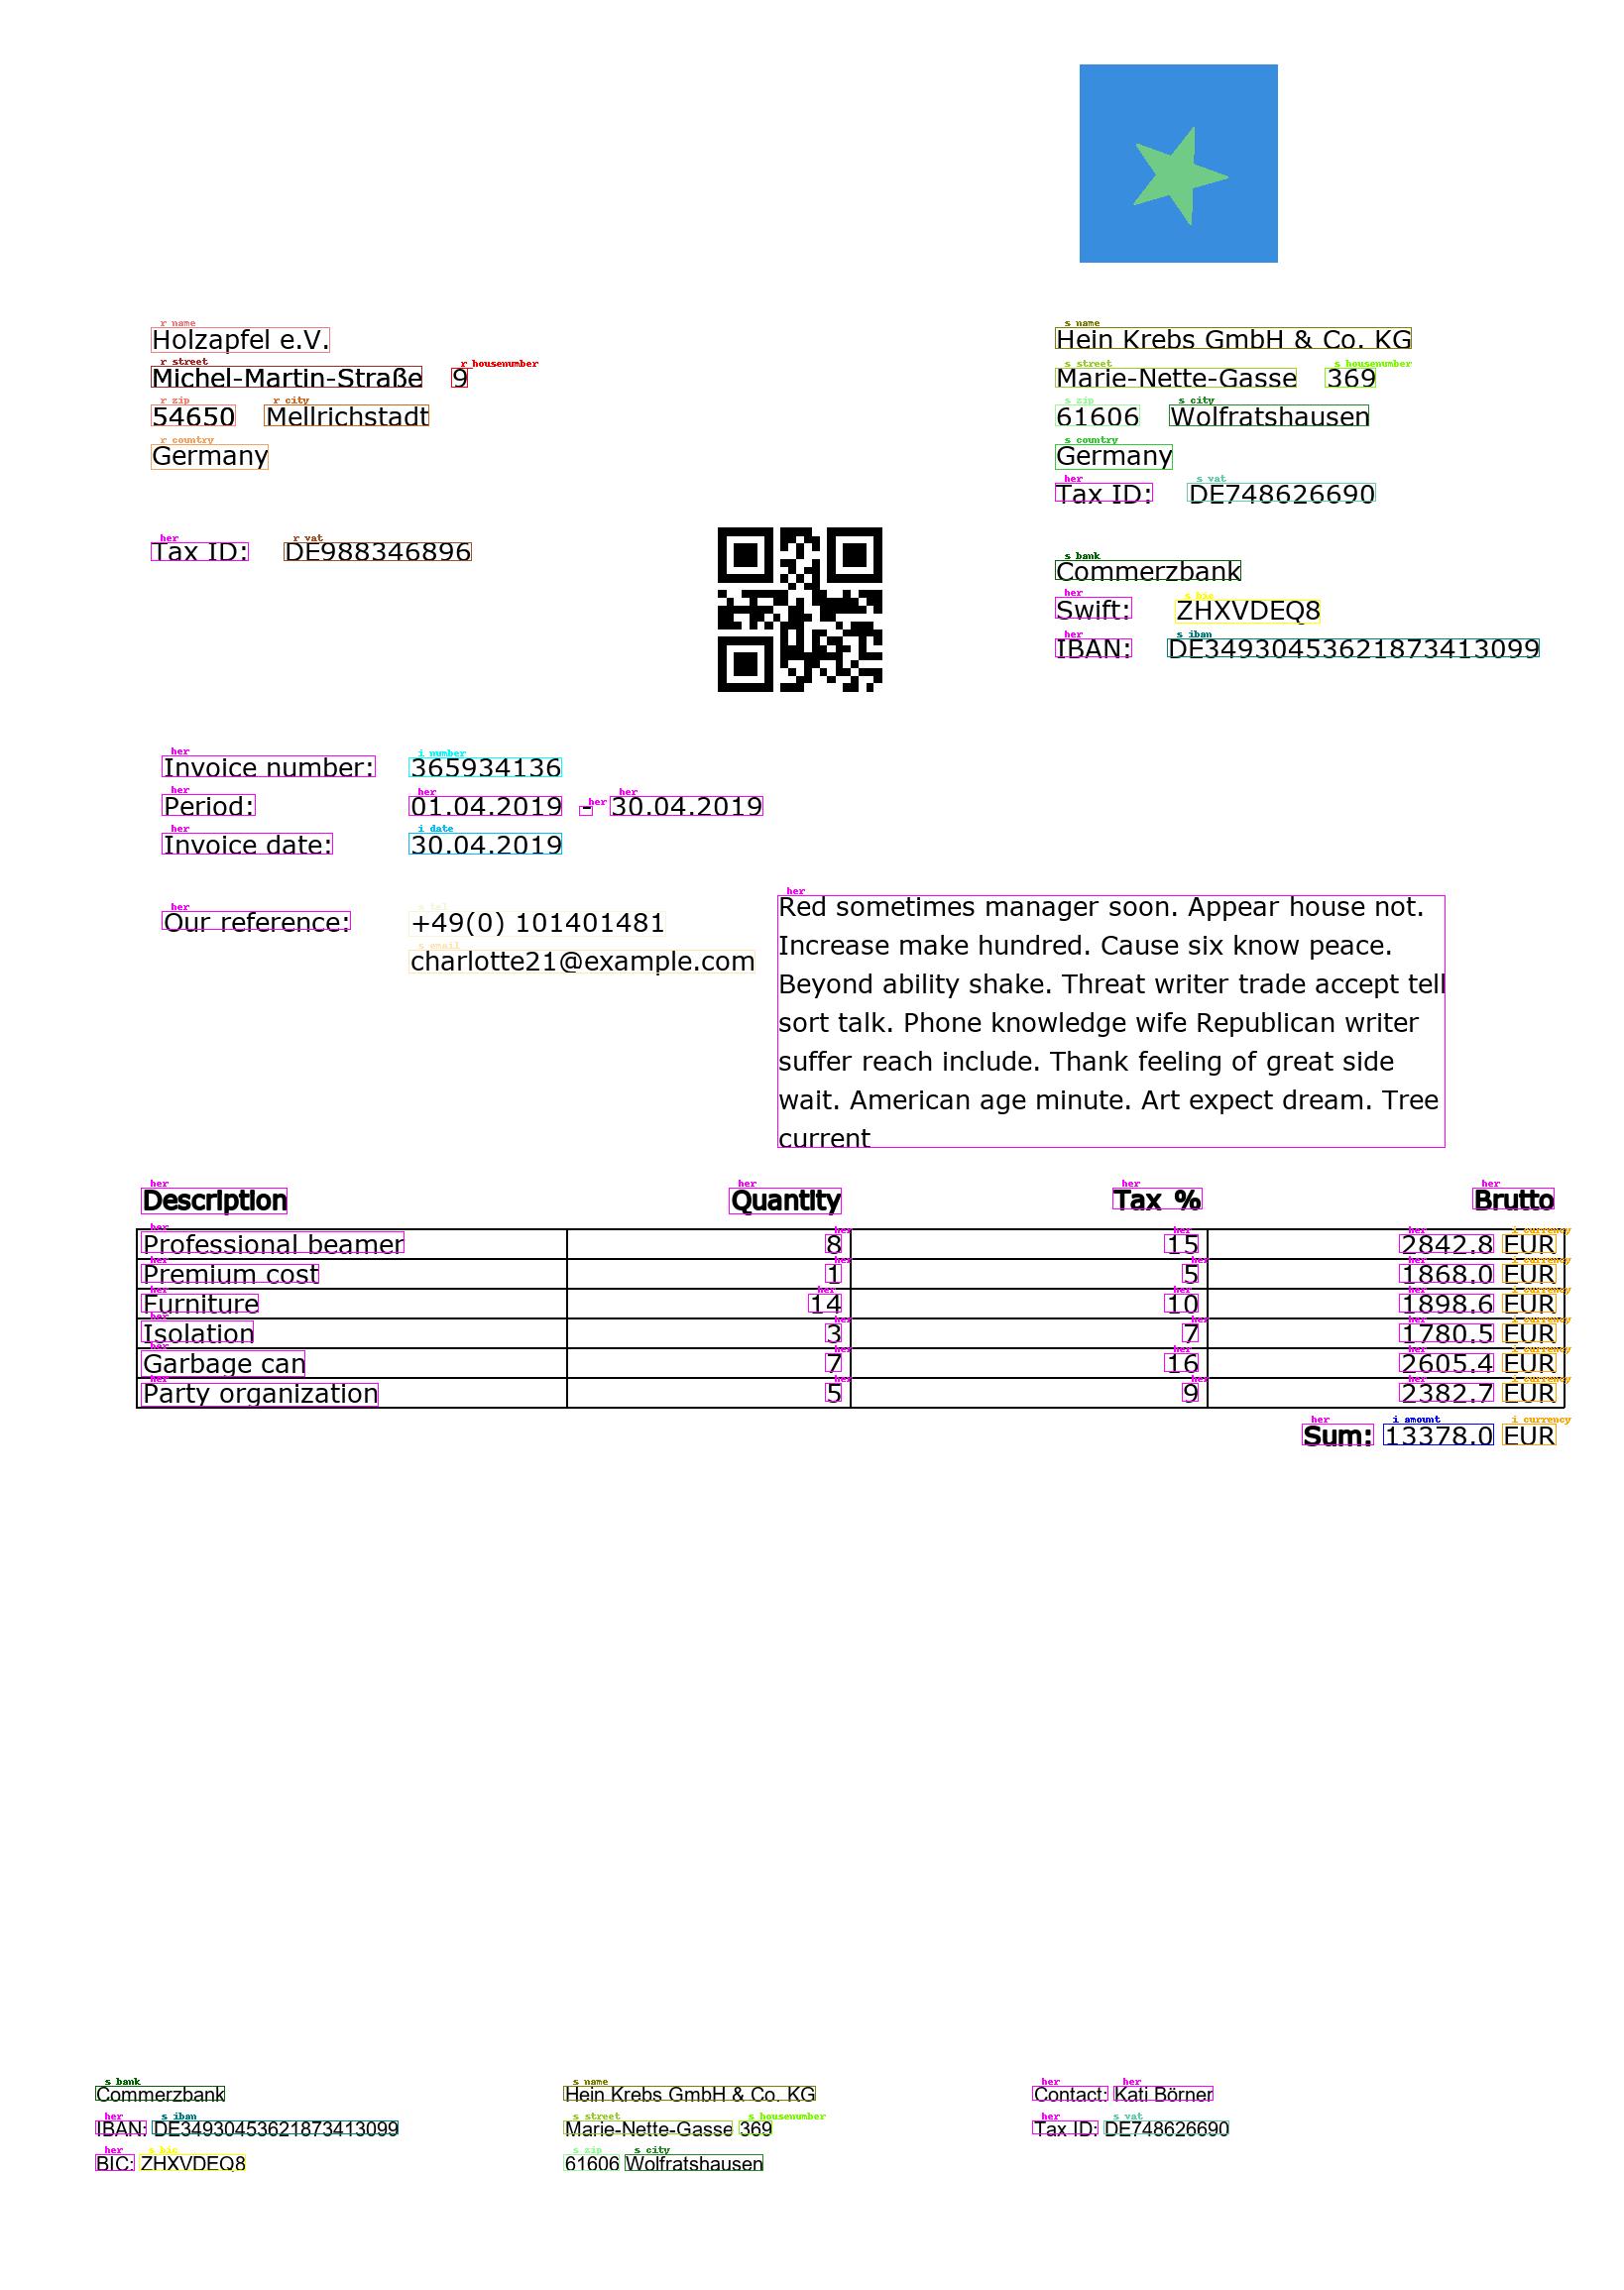

In [38]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {
        'r_name':           'lightcoral',
        'r_street':         'brown',
        'r_housenumber':    'red', 
        'r_zip':            'Salmon',
        'r_city':           'chocolate',
        'r_country':        'Sandybrown',
        'r_vat':            'Sienna',
        's_name':           'olive',      
        's_street':         'yellowgreen',
        's_housenumber':    'lawngreen',
        's_zip':            'palegreen',
        's_city':           'forestgreen',
        's_country':        'limegreen',
        's_vat':            'mediumaquamarine',
        's_bank':           'darkgreen',
        's_bic':            'yellow',
        's_iban':           'teal',
        's_tel':            'beige',
        's_email':          'moccasin',
        'i_number':         'aqua',
        'i_date':           'deepskyblue',
        'i_duedate':        'royalblue',
        'i_amount':         'blue',
        'i_currency':       'orange',
        'her':            'magenta'
    }

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

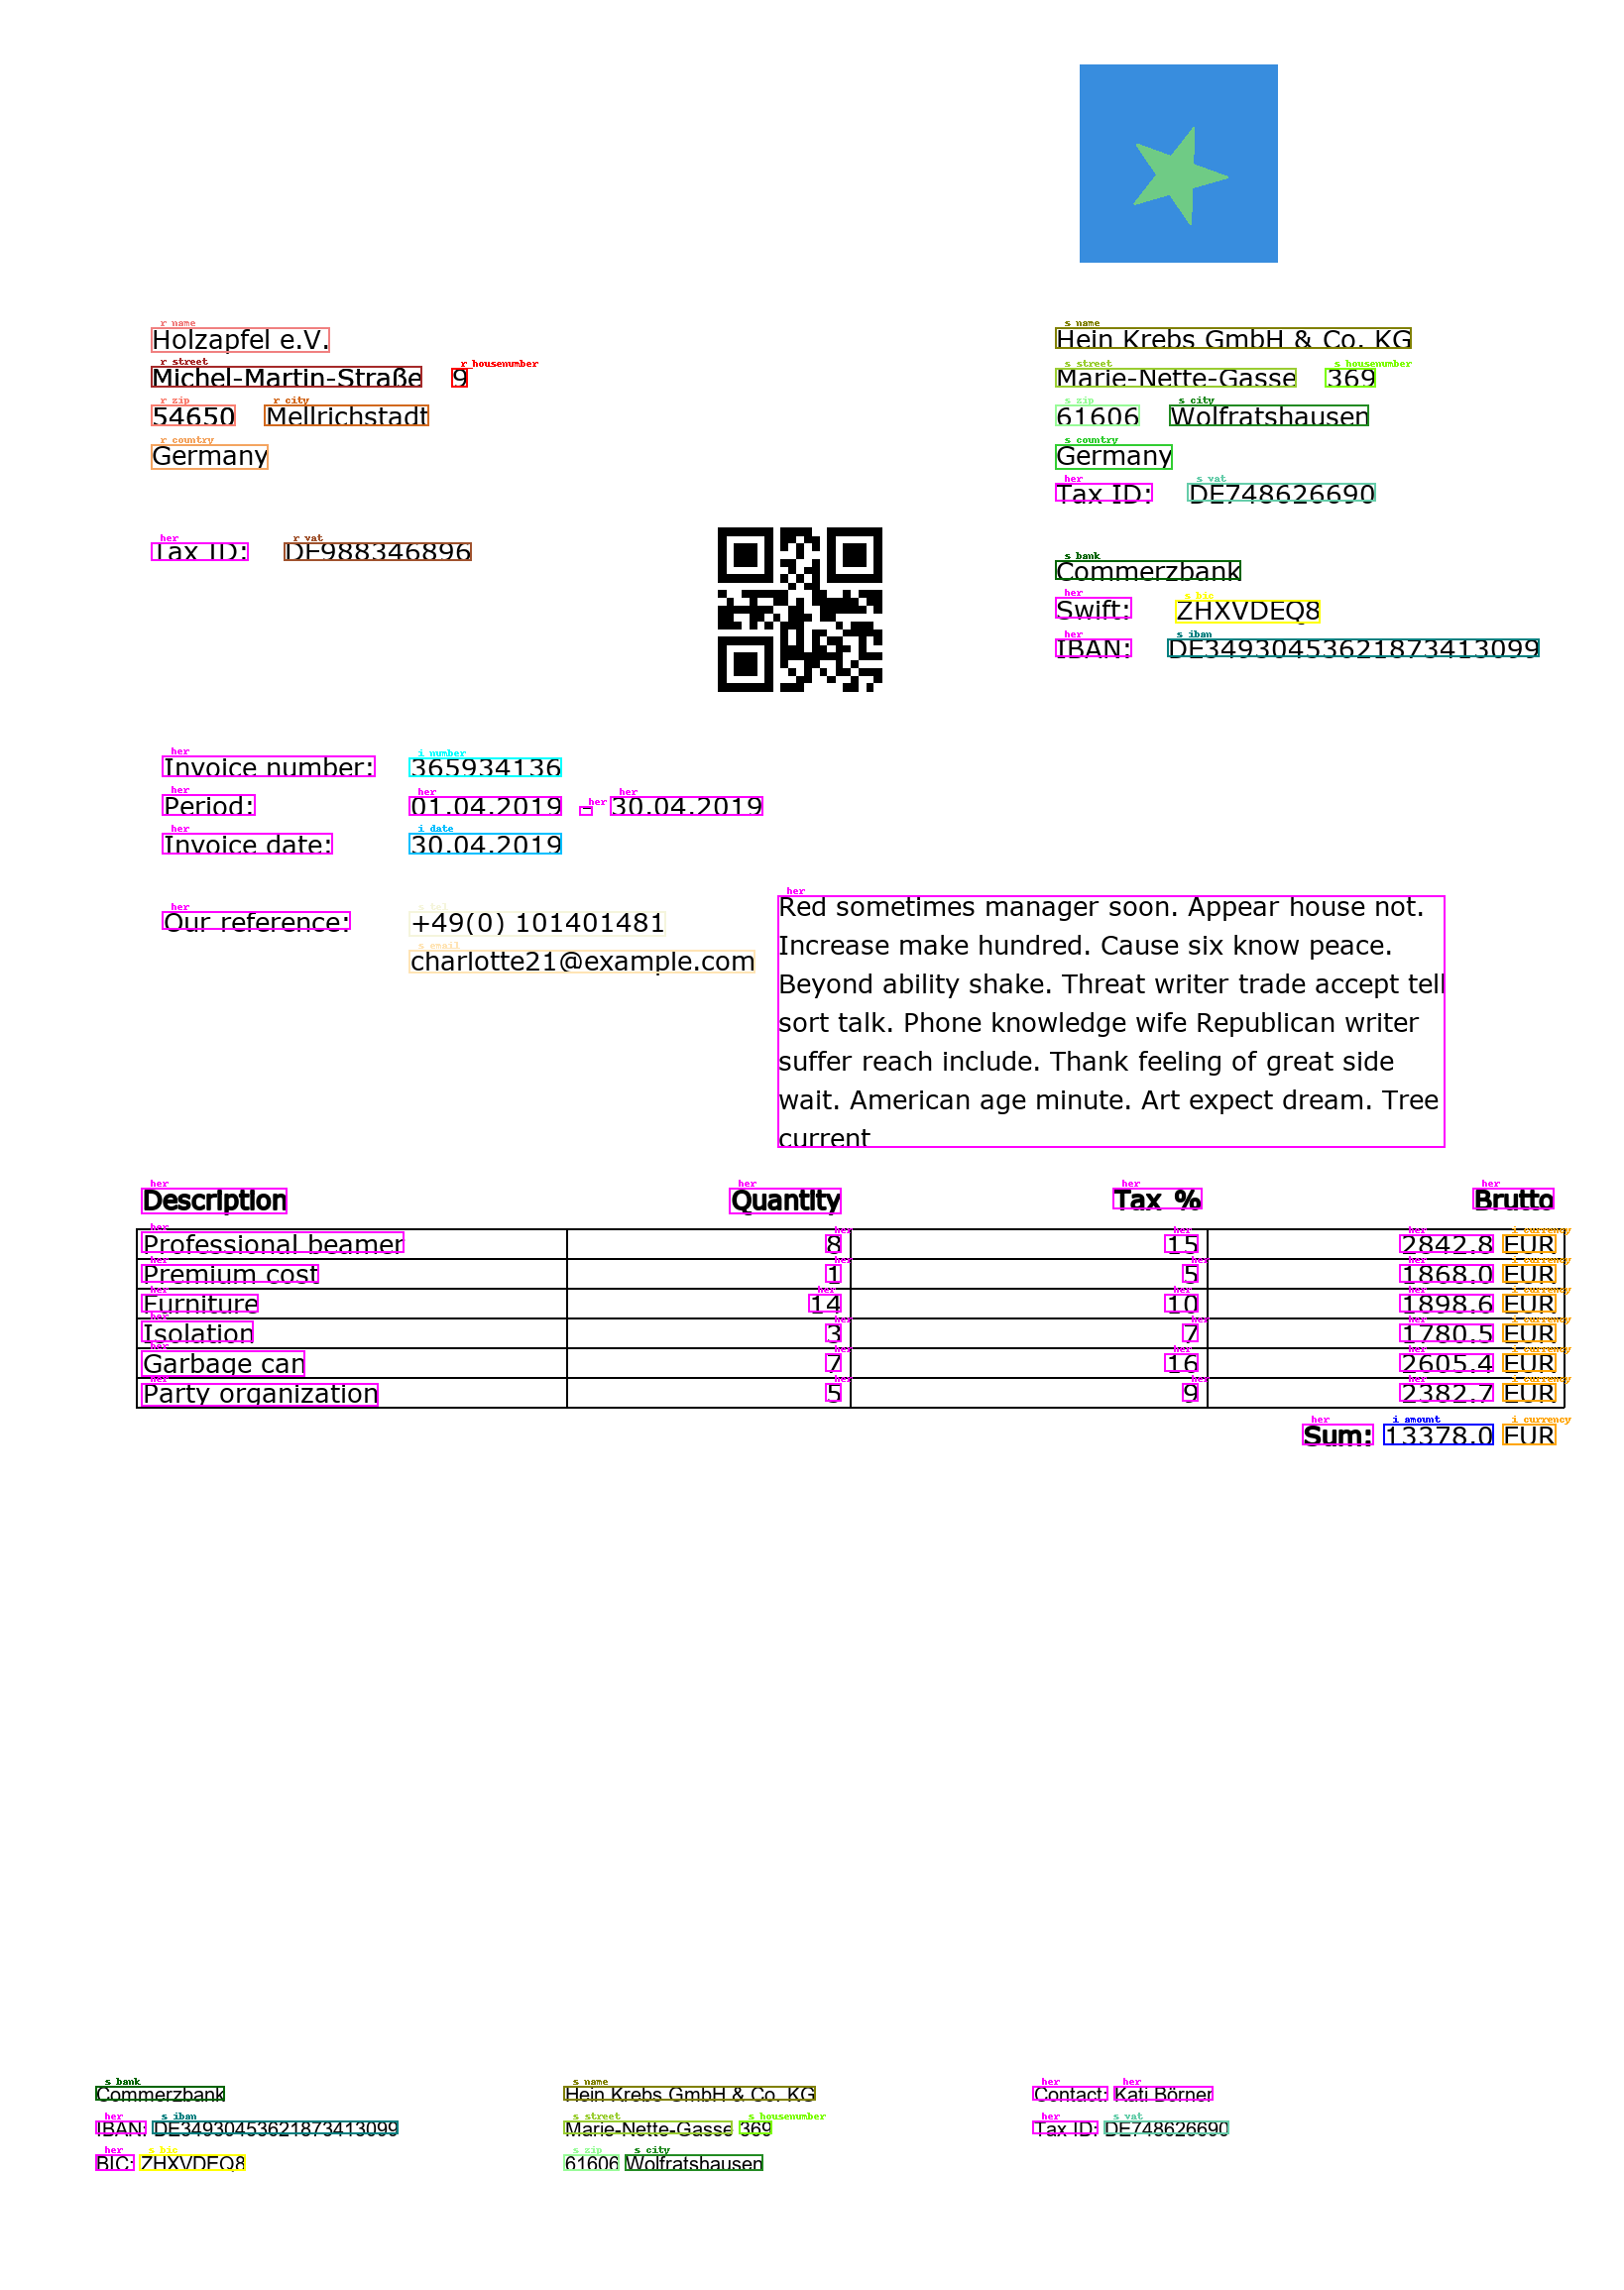

In [39]:
image = example["image"]
image = image.convert("RGB")

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['tokens'], example['bboxes'], example['ner_tags']):
  actual_label = iob_to_label(id2label[label]).lower()
  box = unnormalize_box(box, width, height)
  draw.rectangle(box, outline=label2color[actual_label], width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

image